In [1]:
#Importing the necessary liberaries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("MY2010-2014 Fuel Consumption Ratings 5-cycle.csv", encoding = 'cp1252')

In [3]:
df.head(10)

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION_CITY,FUEL CONSUMPTION_HWY,FUEL CONSUMPTION_COMB,FUEL CONSUMPTION_COMB_MPG,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30.0,219.0
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32.0,205.0
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28.0,230.0
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21.0,304.0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24.0,274.0
5,2010,ACURA,RL AWD,MID-SIZE,3.7,6.0,AS5,Z,14.7,10.6,12.9,22.0,297.0
6,2010,ACURA,TL,MID-SIZE,3.5,6.0,AS5,Z,13.1,8.9,11.2,25.0,258.0
7,2010,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS5,Z,13.8,9.6,11.9,24.0,274.0
8,2010,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24.0,267.0
9,2010,ACURA,TSX,COMPACT,2.4,4.0,AS5,Z,11.0,7.8,9.5,30.0,219.0


In [14]:
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
count,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000
mean,2012.014742,3.491901,5.962120,13.902650,9.932208,12.116328,25.168875,267.660198
std,1.404536,1.390957,1.872838,4.162894,2.807196,3.524127,6.956407,64.317040
min,2010.000000,1.000000,2.000000,4.500000,4.900000,4.700000,11.000000,108.000000
25%,2011.000000,2.400000,4.000000,11.000000,8.000000,9.700000,20.000000,221.000000
50%,2012.000000,3.500000,6.000000,13.200000,9.300000,11.400000,25.000000,260.000000
75%,2013.000000,4.600000,8.000000,16.000000,11.200000,13.900000,29.000000,305.000000
max,2014.000000,8.400000,16.000000,30.400000,20.800000,26.000000,60.000000,566.000000


In [5]:
# Checking for missing values
df.isna().sum()

MODEL YEAR                   16
MAKE                          6
MODEL                        25
VEHICLE CLASS                25
ENGINE SIZE                  25
CYLINDERS                    25
TRANSMISSION                 25
FUEL TYPE                    25
FUEL CONSUMPTION_CITY        25
FUEL CONSUMPTION_HWY         25
FUEL CONSUMPTION_COMB        25
FUEL CONSUMPTION_COMB_MPG    25
CO2 EMISSIONS                25
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

MODEL YEAR                   0
MAKE                         0
MODEL                        0
VEHICLE CLASS                0
ENGINE SIZE                  0
CYLINDERS                    0
TRANSMISSION                 0
FUEL TYPE                    0
FUEL CONSUMPTION_CITY        0
FUEL CONSUMPTION_HWY         0
FUEL CONSUMPTION_COMB        0
FUEL CONSUMPTION_COMB_MPG    0
CO2 EMISSIONS                0
dtype: int64

In [16]:
#Checking the data types

df.dtypes

MODEL YEAR                             int64
MAKE                                  object
MODEL # = high output engine          object
VEHICLE CLASS                         object
ENGINE SIZE (L)                      float64
CYLINDERS                              int64
TRANSMISSION                          object
FUEL TYPE                             object
FUEL CONSUMPTION* CITY (L/100 km)    float64
HWY (L/100 km)                       float64
COMB (L/100 km)                      float64
COMB (mpg)                             int64
CO2 EMISSIONS (g/km)                   int64
dtype: object

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [18]:
# Check correlation among the features
df.corr()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
MODEL YEAR,1.000000,-0.059026,-0.056762,-0.089863,-0.101831,-0.094261,0.125379,-0.126525
ENGINE SIZE (L),-0.059026,1.000000,0.917291,0.815753,0.771050,0.806126,-0.803472,0.857052
CYLINDERS,-0.056762,0.917291,1.000000,0.784184,0.716811,0.766065,-0.754037,0.840469
FUEL CONSUMPTION* CITY (L/100 km),-0.089863,0.815753,0.784184,1.000000,0.965417,0.995566,-0.932240,0.891427
HWY (L/100 km),-0.101831,0.771050,0.716811,0.965417,1.000000,0.985518,-0.895407,0.855552
COMB (L/100 km),-0.094261,0.806126,0.766065,0.995566,0.985518,1.000000,-0.926282,0.885359
COMB (mpg),0.125379,-0.803472,-0.754037,-0.932240,-0.895407,-0.926282,1.000000,-0.897255
CO2 EMISSIONS (g/km),-0.126525,0.857052,0.840469,0.891427,0.855552,0.885359,-0.897255,1.000000


<AxesSubplot: >

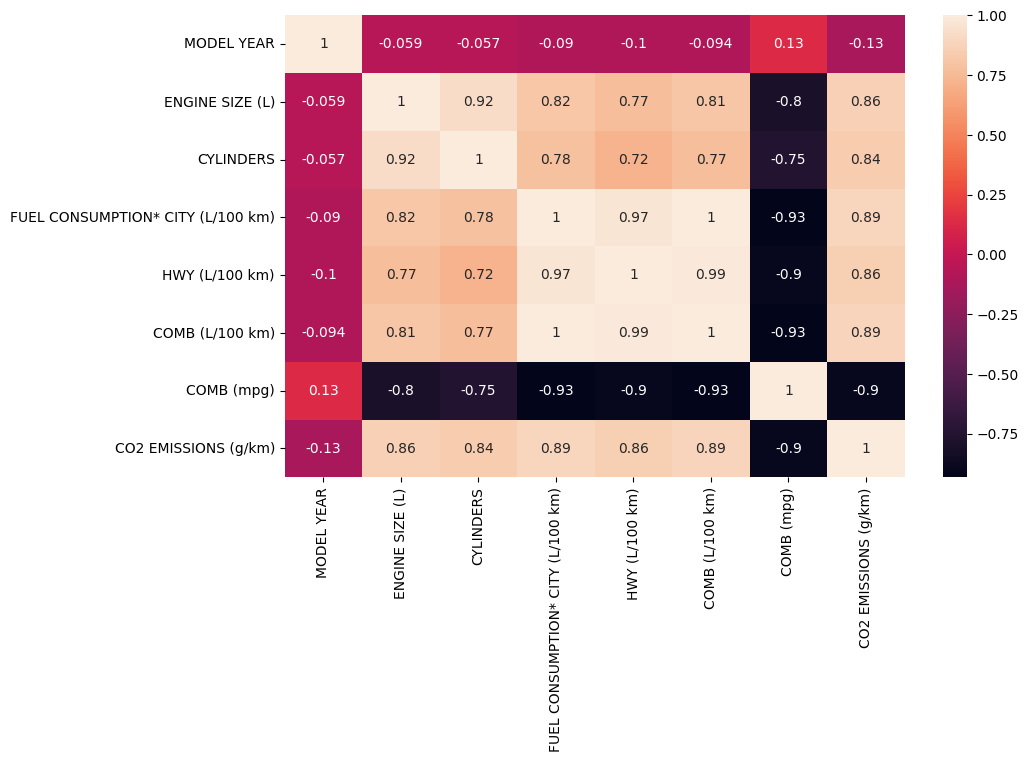

In [19]:
# Visualization of the correlations on heatmap
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(data = df.corr(), annot = True )

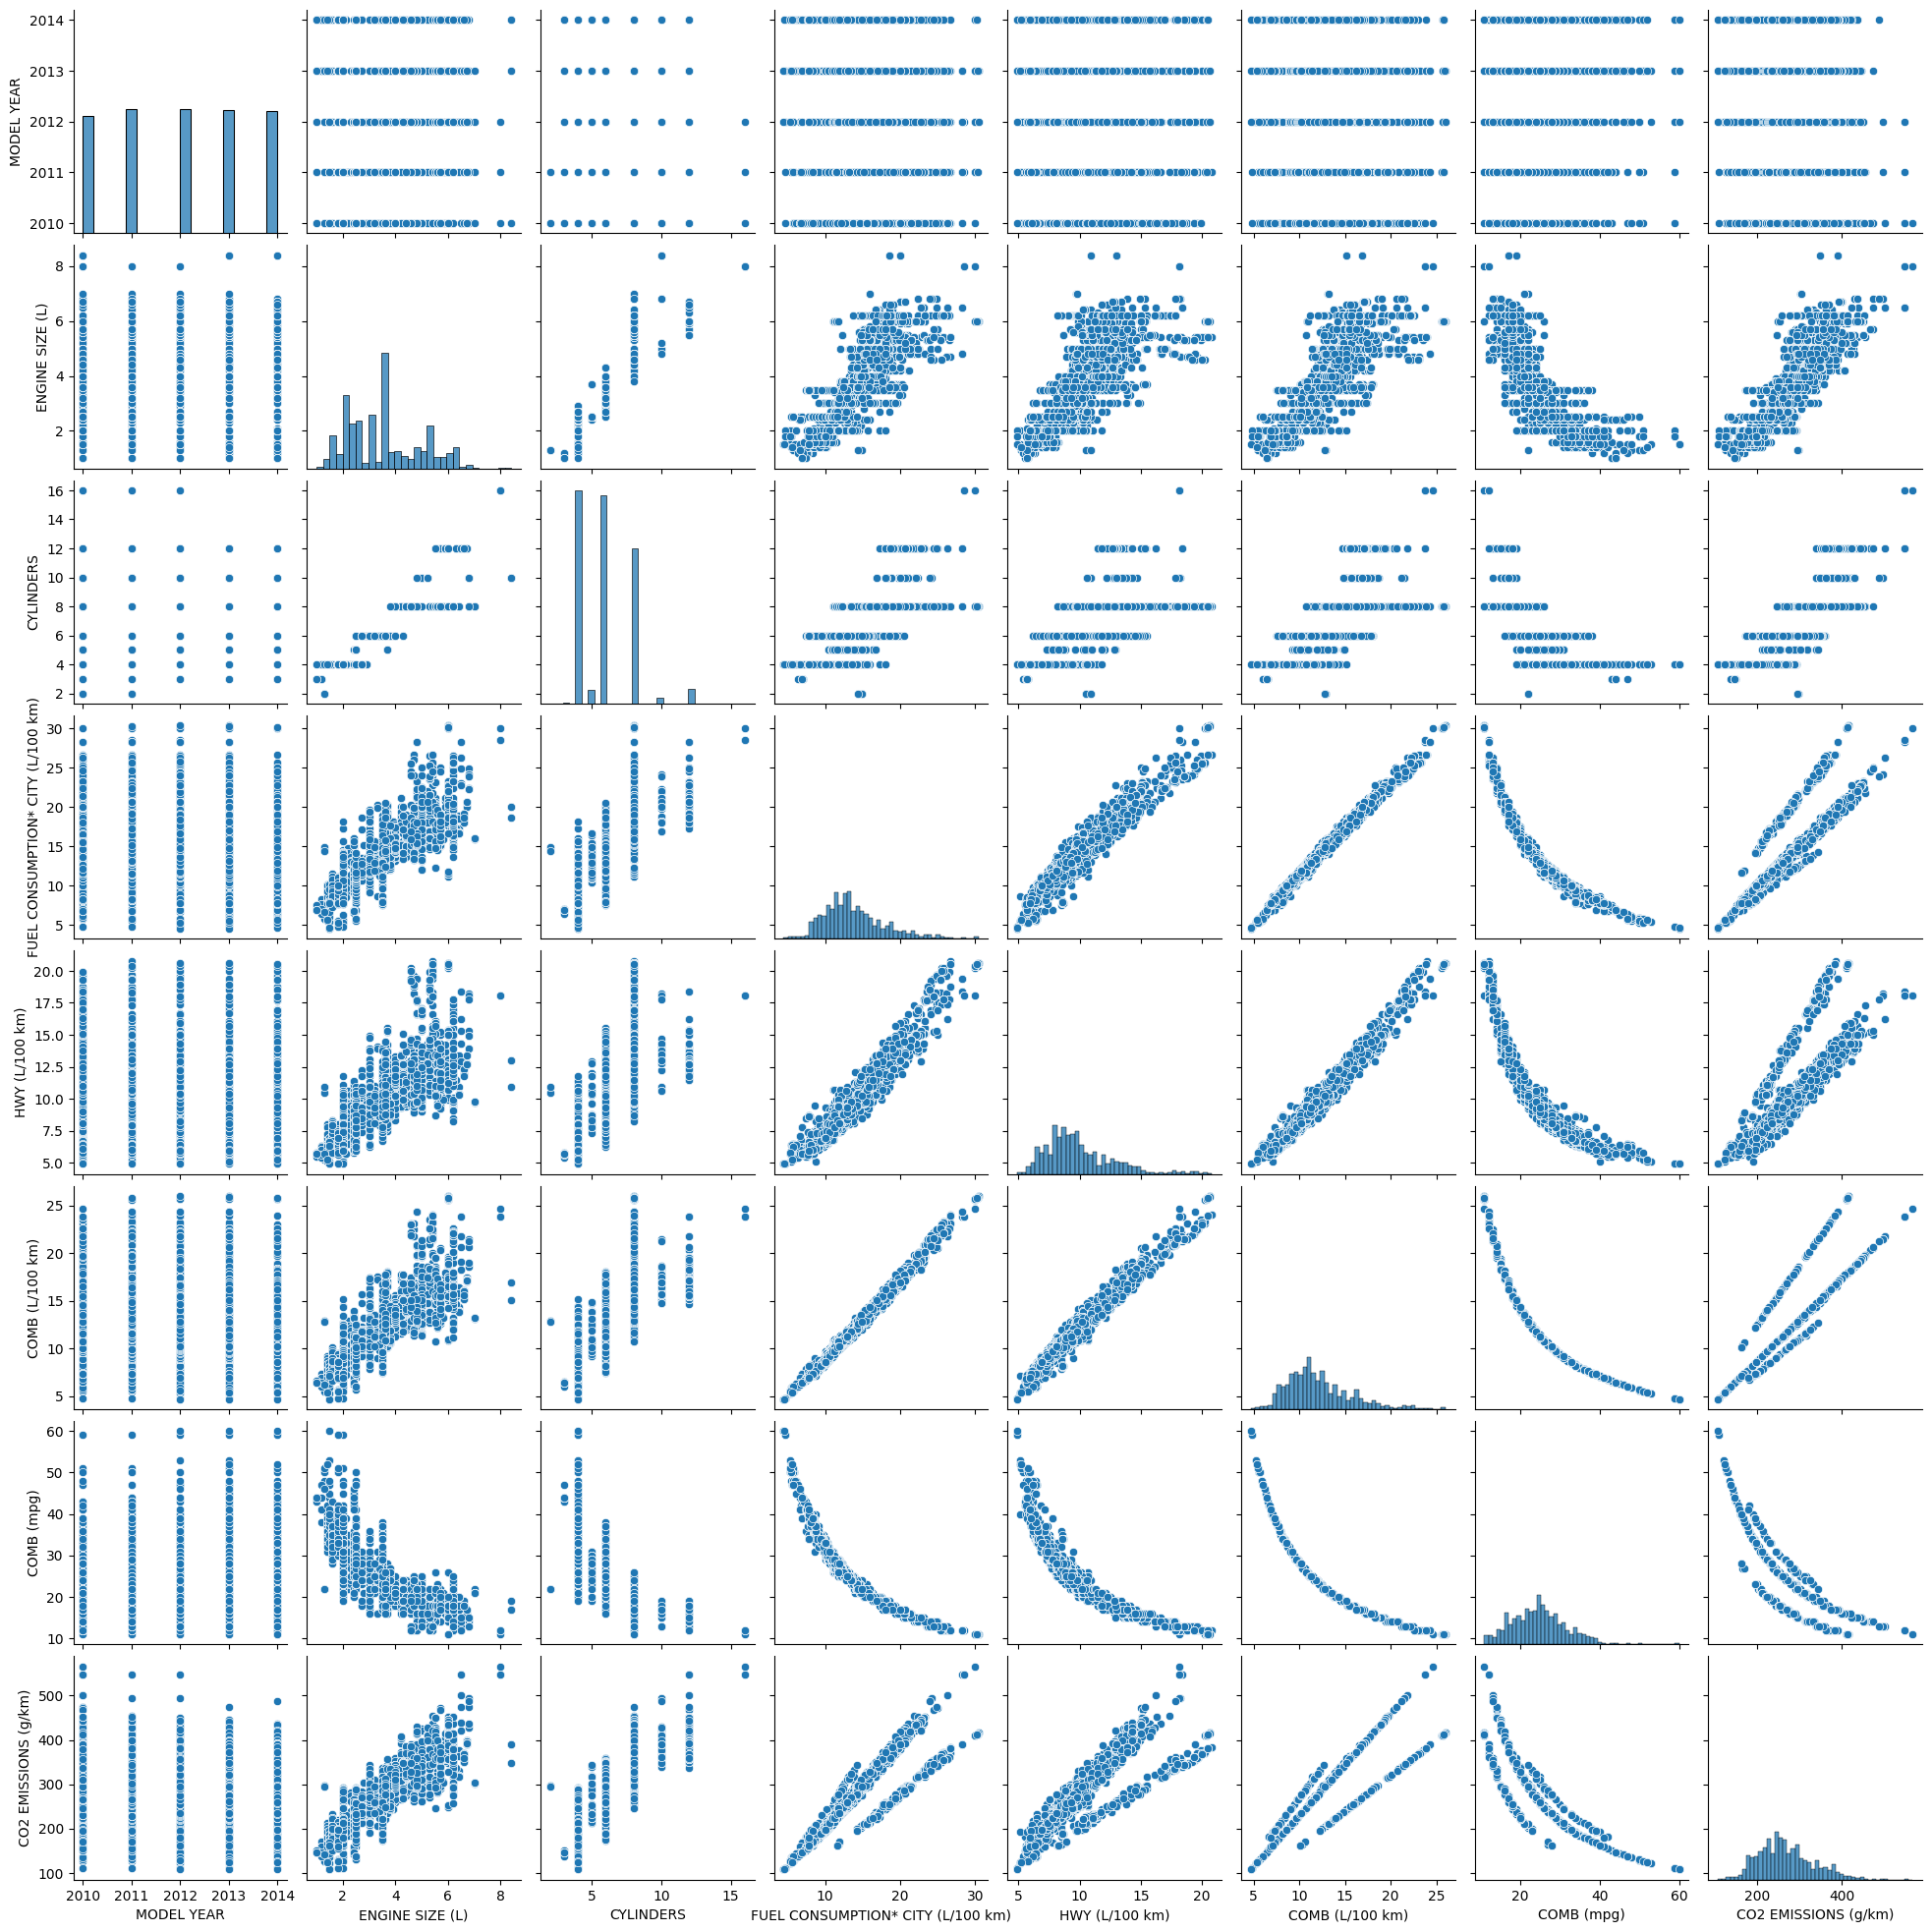

In [20]:
sns.pairplot(df)

<AxesSubplot: xlabel='FUEL CONSUMPTION* CITY (L/100 km)', ylabel='CO2 EMISSIONS (g/km)'>

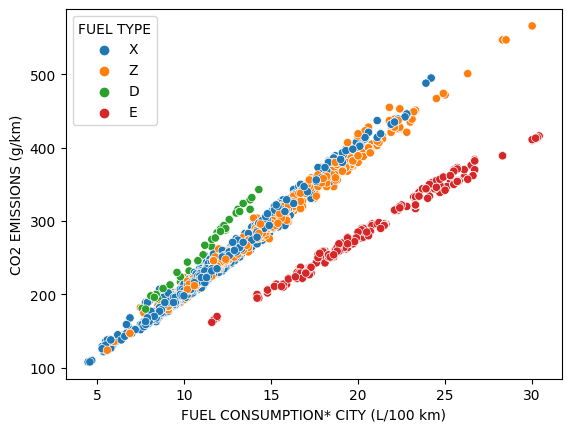

In [21]:
sns.scatterplot(data=df, x='FUEL CONSUMPTION* CITY (L/100 km)', y='CO2 EMISSIONS (g/km)', hue='FUEL TYPE')

In [22]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
# Creating a dataframe of numerical attributes only
num_df = df.select_dtypes(exclude = 'object')
#Dropping CYLINDERS since it is not a numerical attribute
num_df.drop("CYLINDERS", axis = 1, inplace = True)

In [25]:
num_df

,MODEL YEAR,ENGINE SIZE (L),FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2010,2.0,10.9,7.8,9.5,30,219
1,2010,2.0,10.0,7.6,8.9,32,205
2,2010,2.0,11.6,8.1,10.0,28,230
3,2010,3.7,14.8,11.3,13.2,21,304
4,2010,2.3,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...
5354,2014,3.0,13.4,9.8,11.8,24,271
5355,2014,3.2,13.2,9.5,11.5,25,264
5356,2014,3.0,13.4,9.8,11.8,24,271
5357,2014,3.2,12.9,9.3,11.3,25,260


## 2. Using numerical continuous variables to predict CO2 emissions

In [26]:
# Instantiating Scaler for scaling the numerical variables
scaler = StandardScaler()

In [27]:
"""Function for training the model on all the different numerical continuous variables one by one
   by looping through them, trainnig the model, predicting and evaluating them"""
def train_and_display(df):
    #Secluding the last column which is our label column, CO2 EMISSIONS (g/km)
    for i in df.columns[:-1]:
        # Reshaping the series to appear as a single column in dataframe
        X = df[i].to_numpy().reshape(-1,1)
        y = df['CO2 EMISSIONS (g/km)']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        model.fit(X_train, y_train)
        basem_preds = model.predict(X_test)
        mean_abs = mean_absolute_error(y_test, basem_preds)
        mean_squared = mean_squared_error(y_test, basem_preds)
        print(f"The result of the mean_absolute_error for {i} is: {mean_abs:.2f}")
        print(f"The result of the root mean squared error for {i} is : {np.sqrt(mean_squared):.2f}")
        print(f"the result of the coefficient of determination for {i} is: {r2_score(y_test, basem_preds):.2f}")
        print(f'Model parameters: m = {model.coef_[0]:.2f}, c = {model.intercept_:.2f}\n')

train_and_display(num_df)

The result of the mean_absolute_error for MODEL YEAR is: 50.81
The result of the root mean squared error for MODEL YEAR is : 63.52
the result of the coefficient of determination for MODEL YEAR is: 0.02
Model parameters: m = -5.68, c = 11692.16

The result of the mean_absolute_error for ENGINE SIZE (L) is: 24.49
The result of the root mean squared error for ENGINE SIZE (L) is : 33.08
the result of the coefficient of determination for ENGINE SIZE (L) is: 0.73
Model parameters: m = 39.65, c = 129.31

The result of the mean_absolute_error for FUEL CONSUMPTION* CITY (L/100 km) is: 20.18
The result of the root mean squared error for FUEL CONSUMPTION* CITY (L/100 km) is : 28.72
the result of the coefficient of determination for FUEL CONSUMPTION* CITY (L/100 km) is: 0.80
Model parameters: m = 13.70, c = 77.17

The result of the mean_absolute_error for HWY (L/100 km) is: 24.36
The result of the root mean squared error for HWY (L/100 km) is : 33.17
the result of the coefficient of determination 

In [28]:
num_df

,MODEL YEAR,ENGINE SIZE (L),FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2010,2.0,10.9,7.8,9.5,30,219
1,2010,2.0,10.0,7.6,8.9,32,205
2,2010,2.0,11.6,8.1,10.0,28,230
3,2010,3.7,14.8,11.3,13.2,21,304
4,2010,2.3,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...
5354,2014,3.0,13.4,9.8,11.8,24,271
5355,2014,3.2,13.2,9.5,11.5,25,264
5356,2014,3.0,13.4,9.8,11.8,24,271
5357,2014,3.2,12.9,9.3,11.3,25,260


## Exploratory data analysis

<AxesSubplot: >

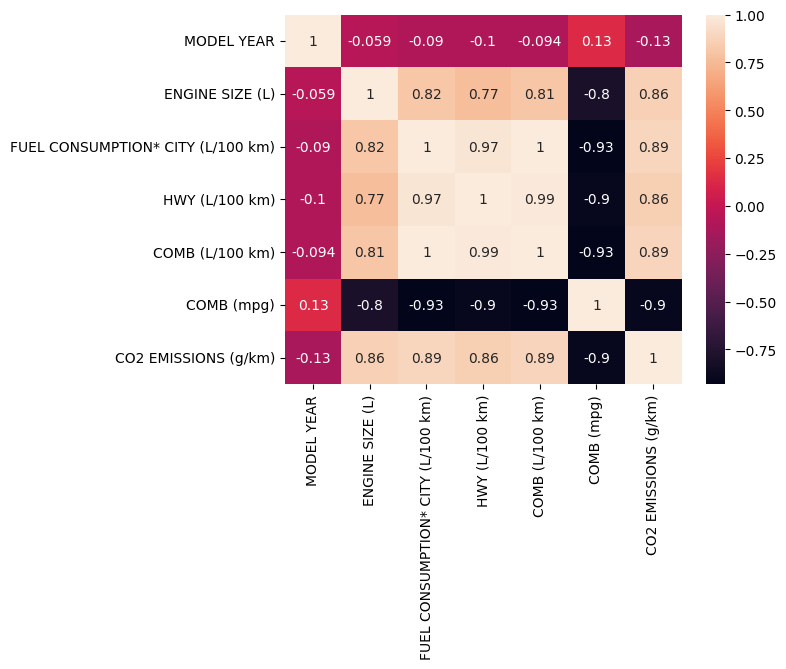

In [29]:
sns.heatmap(data = num_df.corr(), annot = True) 

### From the above, model year does not have much of an effect on CO2 EMISSIONS since its correlation is low as compared to the other attributes

<AxesSubplot: xlabel='MODEL YEAR', ylabel='CO2 EMISSIONS (g/km)'>

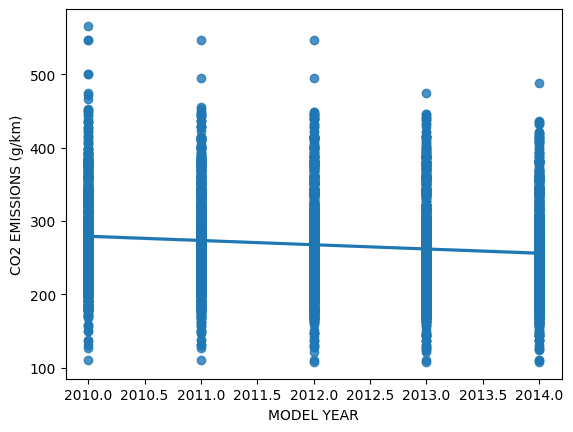

In [30]:
sns.regplot(data = num_df, x = "MODEL YEAR", y = "CO2 EMISSIONS (g/km)")

### Dropping Model Year attribute because it does not have an effect on the CO2 EMISSIONS 

In [31]:
dropped_num_df = num_df.drop("MODEL YEAR", axis = 1)
dropped_num_df

,ENGINE SIZE (L),FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2.0,10.9,7.8,9.5,30,219
1,2.0,10.0,7.6,8.9,32,205
2,2.0,11.6,8.1,10.0,28,230
3,3.7,14.8,11.3,13.2,21,304
4,2.3,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...
5354,3.0,13.4,9.8,11.8,24,271
5355,3.2,13.2,9.5,11.5,25,264
5356,3.0,13.4,9.8,11.8,24,271
5357,3.2,12.9,9.3,11.3,25,260


### Building a multiple linear Regression model

In [32]:
dropped_num_df

,ENGINE SIZE (L),FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2.0,10.9,7.8,9.5,30,219
1,2.0,10.0,7.6,8.9,32,205
2,2.0,11.6,8.1,10.0,28,230
3,3.7,14.8,11.3,13.2,21,304
4,2.3,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...
5354,3.0,13.4,9.8,11.8,24,271
5355,3.2,13.2,9.5,11.5,25,264
5356,3.0,13.4,9.8,11.8,24,271
5357,3.2,12.9,9.3,11.3,25,260


In [33]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dropped_num_df = scaler.fit_transform(dropped_num_df)

In [34]:
scaled_dropped_num_df[:, -1].shape

(5359,)

In [35]:
# Assigning X and y values
X = scaled_dropped_num_df[:,:-1]
y = num_df["CO2 EMISSIONS (g/km)"]

In [36]:
# Splitting the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Instantiating linear regression model
model = LinearRegression()

In [38]:
# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [39]:
basem_preds = model.predict(X_test)
mean_abs = mean_absolute_error(y_test, basem_preds)
mean_squared = mean_squared_error(y_test, basem_preds)
print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
print(f"the result of the coefficient of determination is: {r2_score(y_test, basem_preds):.2f}")

The result of the mean_absolute_error is: 15.25
The result of the root mean squared error is : 23.51
the result of the coefficient of determination is: 0.87


## 3. Determining whether there is change in CO2 Emissions over the years

In [40]:
df.groupby("MODEL YEAR")['CO2 EMISSIONS (g/km)'].mean()

MODEL YEAR
2010    278.017476
2011    274.428571
2012    269.663611
2013    260.419593
2014    256.116713
Name: CO2 EMISSIONS (g/km), dtype: float64

Text(0, 0.5, 'CO2 EMISSIONS')

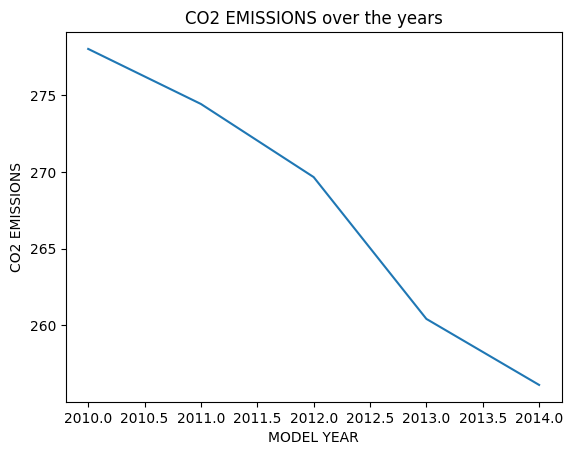

In [41]:
df.groupby('MODEL YEAR')['CO2 EMISSIONS (g/km)'].mean().plot(kind='line')
plt.title("CO2 EMISSIONS over the years")
plt.ylabel("CO2 EMISSIONS")

### There is a noticeable downward trend of CO2 EMISSIONS over the years

<AxesSubplot: xlabel='MODEL YEAR', ylabel='CO2 EMISSIONS (g/km)'>

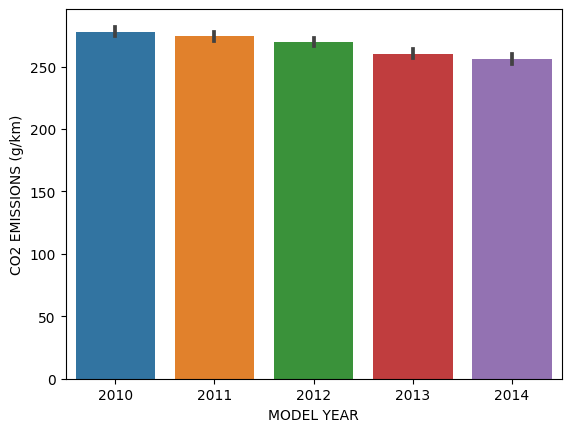

In [42]:
sns.barplot(data = df, x = "MODEL YEAR", y = "CO2 EMISSIONS (g/km)")

<AxesSubplot: xlabel='CYLINDERS', ylabel='CO2 EMISSIONS (g/km)'>

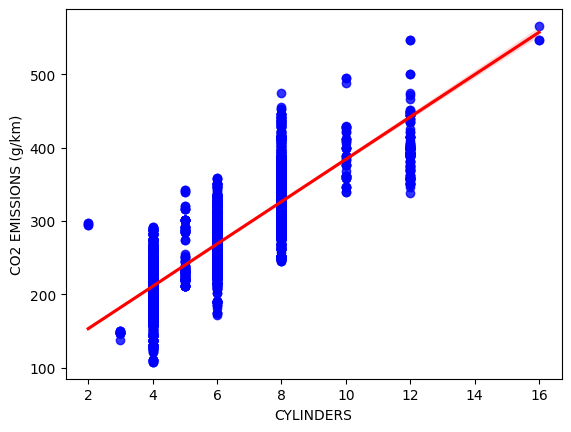

In [43]:
sns.regplot(x = "CYLINDERS", y = "CO2 EMISSIONS (g/km)", data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})

In [44]:
# As more cylinders are added to a vehicle the more the CO2 Emissions 

## 4. Using Categorical variables as the target variables



In [45]:
# The numerical attributes being used for the prediction of Y categorical attributes
dropped_num_df

,ENGINE SIZE (L),FUEL CONSUMPTION* CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2.0,10.9,7.8,9.5,30,219
1,2.0,10.0,7.6,8.9,32,205
2,2.0,11.6,8.1,10.0,28,230
3,3.7,14.8,11.3,13.2,21,304
4,2.3,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...
5354,3.0,13.4,9.8,11.8,24,271
5355,3.2,13.2,9.5,11.5,25,264
5356,3.0,13.4,9.8,11.8,24,271
5357,3.2,12.9,9.3,11.3,25,260


In [46]:
# Creating dataframe of only categorical variables
cat_df = df.select_dtypes( include = 'object')

In [47]:
cat_df.columns

Index(['MAKE', 'MODEL # = high output engine', 'VEHICLE CLASS', 'TRANSMISSION',
       'FUEL TYPE'],
      dtype='object')

In [48]:
cat_df

,MAKE,MODEL # = high output engine,VEHICLE CLASS,TRANSMISSION,FUEL TYPE
0,ACURA,CSX,COMPACT,AS5,X
1,ACURA,CSX,COMPACT,M5,X
2,ACURA,CSX,COMPACT,M6,Z
3,ACURA,MDX AWD,SUV,AS6,Z
4,ACURA,RDX AWD TURBO,SUV,AS5,Z
...,...,...,...,...,...
5354,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5355,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5356,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
5357,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [49]:
# Importing relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [50]:
df_copy = df.copy()

In [51]:
"""This function instantiates the classification model and label encoder. It then label encodes the categorical
   variables of the dataframe"""
def cat_predict(df):
    model = LogisticRegression()
    encoder = LabelEncoder()
    concat_df = df.copy()
    
    # Label encoding categorical variables and replacing the original columns
    for col in cat_df.columns:
        concat_df[col] = encoder.fit_transform(concat_df[col])
    
    # Looping through the dataframe and only selecting one categorical variable as target at a time
    for i in cat_df.columns:
        X = concat_df.drop(i, axis = 1)
        y = cat_df[i]
        
        # Splitting the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        model.fit(X_train, y_train)
        basem_preds = model.predict(X_test)
        print(classification_report(y_true = y_test, y_pred = basem_preds, zero_division = 0))

In [52]:
cat_predict(df)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        ACURA       0.00      0.00      0.00        15
 ASTON MARTIN       0.00      0.00      0.00        12
         AUDI       0.00      0.00      0.00        36
      BENTLEY       0.00      0.00      0.00         6
          BMW       0.08      0.12      0.09        75
      BUGATTI       0.00      0.00      0.00         1
        BUICK       0.00      0.00      0.00        17
     CADILLAC       0.00      0.00      0.00        17
    CHEVROLET       0.06      0.18      0.09       106
     CHRYSLER       0.00      0.00      0.00        16
        DODGE       0.00      0.00      0.00        34
         FIAT       0.00      0.00      0.00         5
         FORD       0.00      0.00      0.00        90
          GMC       0.25      0.61      0.36        69
        HONDA       0.00      0.00      0.00        22
       HUMMER       0.00      0.00      0.00         2
      HYUNDAI       0.00      0.00      0.00        27
     INFI

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                        precision    recall  f1-score   support

                      1 SERIES M COUPE       0.00      0.00      0.00         1
                            128i COUPE       0.00      0.00      0.00         1
                        135i CABRIOLET       0.00      0.00      0.00         4
                            135i COUPE       0.00      0.00      0.00         2
                  1500 (FuelSaver MDS)       0.00      0.00      0.00         1
                            1500 (MDS)       0.00      0.00      0.00         1
              1500 4X4 (FuelSaver MDS)       0.00      0.00      0.00         2
                        1500 4X4 (MDS)       0.00      0.00      0.00         1
                       1500 4X4 DIESEL       0.00      0.00      0.00         1
                              1500 FFV       0.00      0.00      0.00         2
                          1500 FFV 4X4       0.00      0.00      0.00         1
                       200 CONVERTIBLE 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          precision    recall  f1-score   support

                 COMPACT       0.29      0.65      0.40       156
               FULL-SIZE       0.15      0.09      0.11        78
                MID-SIZE       0.18      0.10      0.13       156
             MINICOMPACT       0.00      0.00      0.00        57
                 MINIVAN       0.00      0.00      0.00        19
    PICKUP TRUCK - SMALL       0.00      0.00      0.00        37
 PICKUP TRUCK - STANDARD       0.19      0.23      0.21        86
 SPECIAL PURPOSE VEHICLE       0.00      0.00      0.00         2
STATION WAGON - MID-SIZE       0.00      0.00      0.00         2
   STATION WAGON - SMALL       0.00      0.00      0.00        39
              SUBCOMPACT       0.31      0.25      0.28        89
                     SUV       0.23      0.59      0.33       145
             SUV - SMALL       0.00      0.00      0.00        55
          SUV - STANDARD       0.00      0.00      0.00        45
         

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

#### Optimizing the model

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
"""This function optimizes the previous model by brute forcing through the listed
   parameters below being evaluated on the best performing variable which was FUEL TYPE"""

def grid_predict(df):
    # Instantiating model
    model = LogisticRegression()
    # List of parameters to be tested
    grid_param = {
       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'penalty':['l1', 'l2', 'elasticnet', 'none']}
    
    # GridSearch operation of the best hyper parameters
    gd_lr = GridSearchCV(estimator = model,
                        param_grid = grid_param,
                        scoring = 'accuracy',
                        cv = 5,
                        n_jobs = -1)
    
    encoder = LabelEncoder()
    concat_df = df.copy()

    for col in cat_df.columns:
        concat_df[col] = encoder.fit_transform(concat_df[col])
    
    X = concat_df.drop("FUEL TYPE", axis = 1)
    y = cat_df['FUEL TYPE']
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    gd_lr.fit(X_train, y_train)
    basem_preds = gd_lr.predict(X_test)
    print(classification_report(y_true = y_test, y_pred = basem_preds, zero_division = 0))
    return gd_lr

In [55]:
temp_2 = grid_predict(df)

              precision    recall  f1-score   support

           D       1.00      1.00      1.00        19
           E       1.00      1.00      1.00        92
           X       0.72      0.81      0.77       535
           Z       0.72      0.61      0.66       426

    accuracy                           0.75      1072
   macro avg       0.86      0.86      0.86      1072
weighted avg       0.75      0.75      0.75      1072



D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none'

In [56]:
temp_2.best_estimator_

LogisticRegression(solver='liblinear')

## 8. Using only non-categorical variables to form groups

In [57]:
from sklearn.cluster import KMeans

In [58]:
wcss = []

#### Finding the best number of clusters to use with the Elbow Method

In [59]:
"""This function loops from 1 to 10 fitting the clustering model """
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(dropped_num_df[["ENGINE SIZE (L)", "COMB (L/100 km)"]])
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

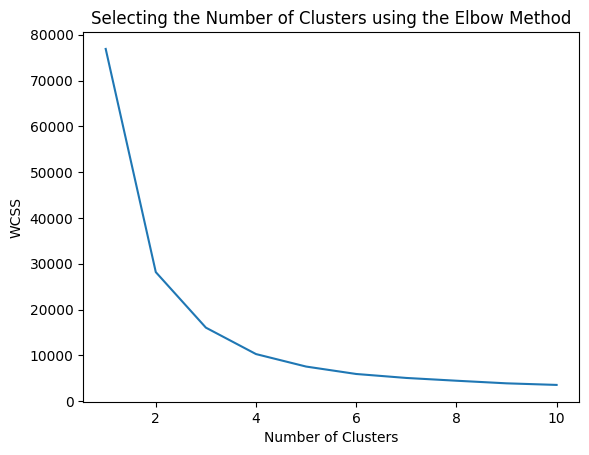

In [60]:
plt.plot(range(1, 11), wcss)
plt.title("Selecting the Number of Clusters using the Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

#### From the graph we can see that 4 is the optimal number of clusters that we need to be using

In [61]:
df2 = dropped_num_df

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
# Scaling the numerical variables
df2_scaled = scaler.fit_transform(df2)
df2_scaled

array([[-1.0726722 , -0.72135632, -0.75962143, -0.74247367,  0.69455053,
        -0.75663834],
       [-1.0726722 , -0.93757224, -0.83087354, -0.91274447,  0.98208211,
        -0.97433036],
       [-1.0726722 , -0.55318838, -0.65274326, -0.60058134,  0.40701895,
        -0.58559461],
       ...,
       [-0.35367552, -0.12075653, -0.04710032, -0.08976894, -0.16804421,
         0.05193202],
       [-0.20987619, -0.24087649, -0.2252306 , -0.23166128, -0.02427842,
        -0.11911171],
       [-0.20987619,  0.23960334,  0.0954039 ,  0.19401572, -0.45557579,
         0.40956891]])

In [64]:
# Making predictions with the model
y_pred1 = KMeans(n_clusters = 4, random_state = 0).fit_predict(df2_scaled)

In [65]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [66]:
#### Using the evaluation metrics

In [67]:
DB_index = davies_bouldin_score(df2_scaled, y_pred1)
DB_index

0.8100662054232748

In [68]:
sil_score = silhouette_score(df2_scaled, y_pred1)
sil_score

0.41739846564241384

## Determining which categorical variable best describes the groups formed

In [69]:
"""Function loops through all categorical variables and compares them to the clusters predictions"""
def comparison(df):
    encoder = LabelEncoder()
    concat_df = df.copy()
    for col in cat_df.columns:
        concat_df[col] = encoder.fit_transform(concat_df[col])
    
    for i in cat_df.columns:
        print(f"Score for {i} is {davies_bouldin_score(concat_df[i].to_numpy().reshape(-1,1), y_pred1)}")
        

In [70]:
comparison(df)

Score for MAKE is 7.783124041607371
Score for MODEL # = high output engine is 15.515273432112206
Score for VEHICLE CLASS is 32.04741364759191
Score for TRANSMISSION is 4.282659135049236
Score for FUEL TYPE is 12.129398873684412
